In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [8]:
m = 200
domX = np.linspace(-1,1,m)

In [21]:
def Legendre(n):
    
    x = sym.Symbol('x',Real=True)
    y = sym.Symbol('y',Real=True)
    
    y = (x**2-1)**n
    
    p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))
    
    return p

def NewtonRaphson(f,x_1,lim=100):
    iteraciones = 0
    while (round(f(x_1),6) != 0) and (iteraciones <= lim):
        x_1 = x_1 - (f(x_1)/Derivative(f,x_1))
        iteraciones += 1
    
    if iteraciones > lim:
        return False
    else:
        return x_1

def Derivative(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

def Raices(f, domX, n, d=4):
    raices = []
    i=1
    raiz = None
    while (raiz != False) and (i <= n):
        x_1 = domX[n-i]
        raizNueva = round(NewtonRaphson(f,x_1),d)
        if raizNueva != raiz:
            raices.append(raizNueva)
            raiz = raizNueva
        i+=1
    return raices

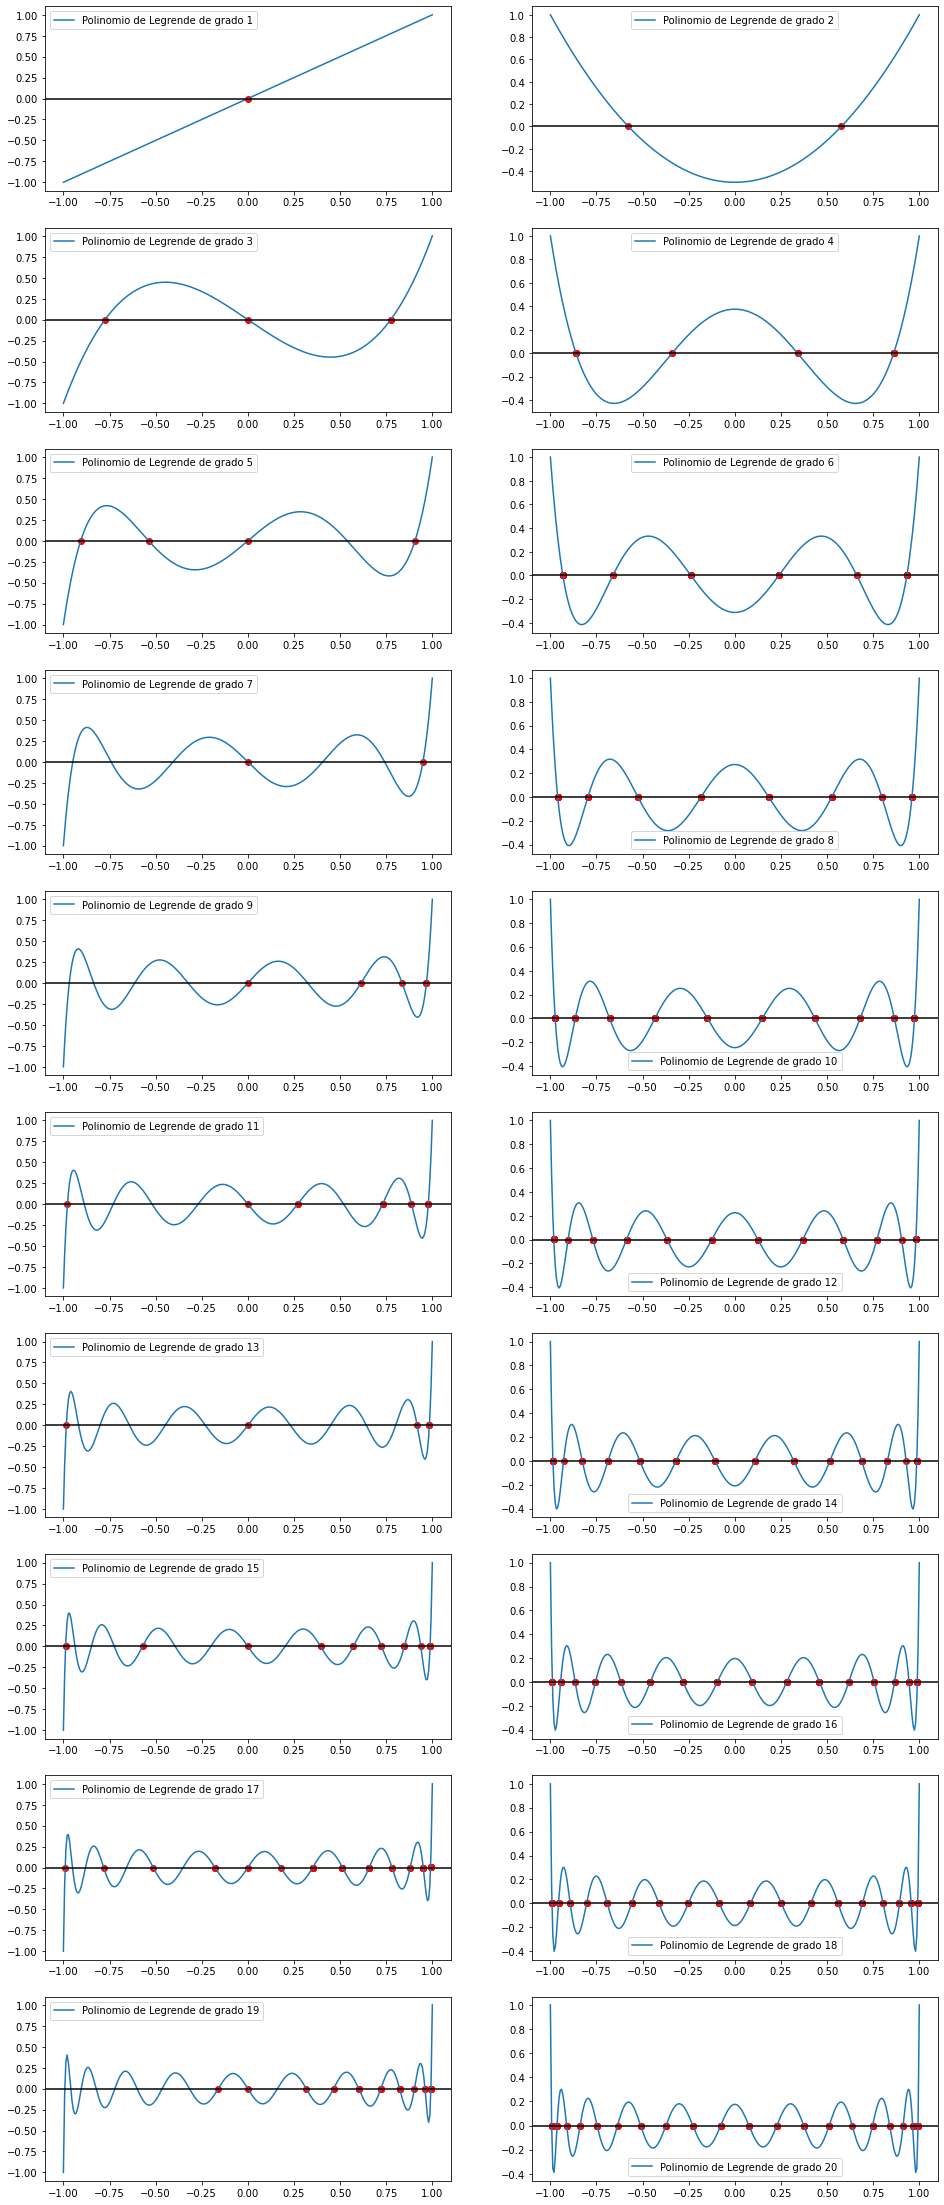

In [23]:
fig = plt.figure(figsize=(16,40))
x = sym.Symbol('x',Real=True)

for n in range(20):
    lp = sym.lambdify([x], Legendre(n+1), "numpy")
    raices = Raices(lp,domX,m)
    
    axn = fig.add_subplot(10,2,n+1)
    string = "Polinomio de Legrende de grado " + str(n+1)
    axn.plot(domX,lp(domX),label=string)
    axn.axhline(y=0,color='#000000')
    for r in raices:
        axn.scatter(r,lp(r),color="r")
    axn.legend()
    
